**BackGround** File and Data Field Descriptions

**train.csv -** Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

**PassengerId -** A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

**HomePlanet -** The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep -** Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin -** The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

**Destination -** The planet the passenger will be debarking to.

**Age -** The age of the passenger.

**VIP -** Whether the passenger has paid for special VIP service during the voyage.RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name -** The first and last names of the passenger.

**Transported -** Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

**import the Library **

In [53]:
# import the Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

In [54]:
# Import Data Load
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [55]:
# Drop Unwanted Columns
train.drop(['PassengerId','Name',"RoomService","FoodCourt","ShoppingMall","Spa","Cabin"],axis=1,inplace=True)
test.drop(['PassengerId','Name',"RoomService","FoodCourt","ShoppingMall","Spa","Cabin"],axis=1,inplace=True)

In [56]:
## Check Null Values
train.isnull().sum()

,0
HomePlanet,201
CryoSleep,217
Destination,182
Age,179
VIP,203
VRDeck,188
Transported,0


In [57]:
# Handle Missing Values
from sklearn.impute import SimpleImputer
print(f"Total No of Null Values {train.isnull().sum().sum()}")

num_cols = list(train.select_dtypes(include=np.number).columns)
#cat_cols = list(train.select_dtypes(exclude=np.number).columns).remove("Transported")
cat_cols = [col for col in train.select_dtypes(exclude=np.number).columns if col != "Transported"]


impute_num=SimpleImputer(strategy='mean')
impute_cat =SimpleImputer(strategy='most_frequent')

train[num_cols]= impute_num.fit_transform(train[num_cols])
train[cat_cols]=impute_cat.fit_transform(train[cat_cols])

test[num_cols]= impute_num.fit_transform(test[num_cols])
test[cat_cols]=impute_cat.fit_transform(test[cat_cols])

print(f"Total No of Null Values {train.isnull().sum().sum()}")



Total No of Null Values 1170
Total No of Null Values 0


In [58]:
# Train Describe()
train.describe()

,Age,VRDeck
count,8693.000000,8693.000000
mean,28.827930,304.854791
std,14.339054,1133.259049
min,0.000000,0.000000
25%,20.000000,0.000000
50%,27.000000,0.000000
75%,37.000000,71.000000
max,79.000000,24133.000000


In [59]:
# train info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8693 non-null   object 
 1   CryoSleep    8693 non-null   object 
 2   Destination  8693 non-null   object 
 3   Age          8693 non-null   float64
 4   VIP          8693 non-null   object 
 5   VRDeck       8693 non-null   float64
 6   Transported  8693 non-null   bool   
dtypes: bool(1), float64(2), object(4)
memory usage: 416.1+ KB


In [60]:
# Convert the Categorical Data into Numerical Data
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
cat_cols =[col for col in train.select_dtypes(exclude=np.number).columns if col !="Transported"]
train[cat_cols]=train[cat_cols].apply(le.fit_transform)
test[cat_cols]=test[cat_cols].apply(le.fit_transform)
train["Transported"] = train["Transported"].map({True: 1, False: 0})
train.head(10)

,HomePlanet,CryoSleep,Destination,Age,VIP,VRDeck,Transported
0,1,0,2,39.0,0,0.000000,0
1,0,0,2,24.0,0,44.000000,1
2,1,0,2,58.0,1,49.000000,0
3,1,0,2,33.0,0,193.000000,0
4,0,0,2,16.0,0,2.000000,1
5,0,0,1,44.0,0,0.000000,1
6,0,0,2,26.0,0,0.000000,1
7,0,1,2,28.0,0,304.854791,1
8,0,0,2,35.0,0,0.000000,1
9,1,1,0,14.0,0,0.000000,1


In [9]:
# Check Class implance
train[["Transported"]].value_counts()

,count
Transported,
1,4378
0,4315


This seems that Both the Classes have equally distributed

In [11]:
# Split the Data into train and test
X=train.drop(columns=["Transported"])
y=train["Transported"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)


**Model 1 :** Logistic Regression

In [37]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
y_test_pred = model_lr.predict(X_test)
y_train_pred =model_lr.predict(X_train)
print(f"Train Accuracy : {accuracy_score(y_train,y_train_pred)}")
print(f"Test Accuracy : {accuracy_score(y_test,y_test_pred)}")

# Confusion matrix
confusion_matrix(y_test,y_test_pred)
print(classification_report(y_test,y_test_pred))

Train Accuracy : 0.7188668392292206
Test Accuracy : 0.721679125934445
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       861
           1       0.79      0.61      0.69       878

    accuracy                           0.72      1739
   macro avg       0.73      0.72      0.72      1739
weighted avg       0.73      0.72      0.72      1739



**Model 2 :** Decision Tree

In [38]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,y_train)
y_test_pred = model_DT.predict(X_test)
y_train_pred =model_DT.predict(X_train)
print(f"Train Accuracy : {accuracy_score(y_train,y_train_pred)}")
print(f"Test Accuracy : {accuracy_score(y_test,y_test_pred)}")

# Confusion matrix
confusion_matrix(y_test,y_test_pred)
print(classification_report(y_test,y_test_pred))

Train Accuracy : 0.865545010066149
Test Accuracy : 0.691776883266245
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       861
           1       0.70      0.69      0.69       878

    accuracy                           0.69      1739
   macro avg       0.69      0.69      0.69      1739
weighted avg       0.69      0.69      0.69      1739



**Model 3 :** Random Forest

In [39]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train,y_train)
y_test_pred = model_RF.predict(X_test)
y_train_pred =model_RF.predict(X_train)
print(f"Train Accuracy : {accuracy_score(y_train,y_train_pred)}")
print(f"Test Accuracy : {accuracy_score(y_test,y_test_pred)}")

# Confusion matrix
confusion_matrix(y_test,y_test_pred)
print(classification_report(y_test,y_test_pred))

Train Accuracy : 0.865545010066149
Test Accuracy : 0.7165037377803335
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       861
           1       0.72      0.71      0.72       878

    accuracy                           0.72      1739
   macro avg       0.72      0.72      0.72      1739
weighted avg       0.72      0.72      0.72      1739



**Model 4 :** Naive Bayes

In [40]:
model_vb = GaussianNB()
model_vb.fit(X_train,y_train)
y_test_pred = model_vb.predict(X_test)
y_train_pred =model_vb.predict(X_train)
print(f"Train Accuracy : {accuracy_score(y_train,y_train_pred)}")
print(f"Test Accuracy : {accuracy_score(y_test,y_test_pred)}")

# Confusion matrix
confusion_matrix(y_test,y_test_pred)
print(classification_report(y_test,y_test_pred))

Train Accuracy : 0.5964912280701754
Test Accuracy : 0.5991949396204715
              precision    recall  f1-score   support

           0       0.80      0.26      0.39       861
           1       0.56      0.94      0.70       878

    accuracy                           0.60      1739
   macro avg       0.68      0.60      0.54      1739
weighted avg       0.68      0.60      0.55      1739



**Model 5 :** KNN

In [41]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train,y_train)
y_test_pred = model_KNN.predict(X_test)
y_train_pred =model_KNN.predict(X_train)
print(f"Train Accuracy : {accuracy_score(y_train,y_train_pred)}")
print(f"Test Accuracy : {accuracy_score(y_test,y_test_pred)}")

# Confusion matrix
confusion_matrix(y_test,y_test_pred)
print(classification_report(y_test,y_test_pred))

Train Accuracy : 0.7627264883520276
Test Accuracy : 0.6935020126509488
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       861
           1       0.71      0.67      0.69       878

    accuracy                           0.69      1739
   macro avg       0.69      0.69      0.69      1739
weighted avg       0.69      0.69      0.69      1739



**Model 6 :** Adaboost

In [42]:
model_adaboost = AdaBoostClassifier()
model_adaboost.fit(X_train,y_train)
y_test_pred = model_adaboost.predict(X_test)
y_train_pred =model_adaboost.predict(X_train)
print(f"Train Accuracy : {accuracy_score(y_train,y_train_pred)}")
print(f"Test Accuracy : {accuracy_score(y_test,y_test_pred)}")

# Confusion matrix
confusion_matrix(y_test,y_test_pred)
print(classification_report(y_test,y_test_pred))

Train Accuracy : 0.7326718435432844
Test Accuracy : 0.7389304197814837
              precision    recall  f1-score   support

           0       0.70      0.81      0.76       861
           1       0.78      0.67      0.72       878

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.75      0.74      0.74      1739



**Model 7 :** Gradient Boosting

In [43]:
model_gradient = GradientBoostingClassifier()
model_adaboost.fit(X_train,y_train)
y_test_pred = model_adaboost.predict(X_test)
y_train_pred =model_adaboost.predict(X_train)
print(f"Train Accuracy : {accuracy_score(y_train,y_train_pred)}")
print(f"Test Accuracy : {accuracy_score(y_test,y_test_pred)}")

# Confusion matrix
confusion_matrix(y_test,y_test_pred)
print(classification_report(y_test,y_test_pred))

Train Accuracy : 0.7326718435432844
Test Accuracy : 0.7389304197814837
              precision    recall  f1-score   support

           0       0.70      0.81      0.76       861
           1       0.78      0.67      0.72       878

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.75      0.74      0.74      1739



**Model 8 :** TensorFlow Deeplearning

In [20]:
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
     tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')])

model_tf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model_tf.fit(X_train,y_train,epochs=100)
model_tf.evaluate(X_test,y_test)

Epoch 1/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6438 - loss: 0.7301
Epoch 2/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6864 - loss: 0.6015
Epoch 3/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7124 - loss: 0.5685
Epoch 4/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7109 - loss: 0.5642
Epoch 5/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7282 - loss: 0.5431
Epoch 6/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7181 - loss: 0.5511
Epoch 7/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7208 - loss: 0.5454
Epoch 8/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7247 - loss: 0.5440
Epoch 9/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7190 - loss: 0.5525
Epoch 10/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7224 - loss: 0.5439
Epoch 11/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7277 - loss: 0.5361
Epoch 12/100
218/218 ━━━━━━━━━━━━━━━━━━━━

[0.4990019202232361, 0.7498562335968018]

In [22]:
model_tf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,717 (139.52 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,812 (93.02 KB)

In [29]:
from os import name
model_tf_sgd= tf.keras.Sequential()
model_tf_sgd.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model_tf_sgd.add(tf.keras.layers.Dense(64, activation='relu',name="Hidden_Layer_1"))
model_tf_sgd.add(tf.keras.layers.Dense(32, activation='relu',name="Hidden_Layer_2"))
model_tf_sgd.add(tf.keras.layers.Dense(16, activation='relu',name="Hidden_Layer_3"))

model_tf.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])
history =model_tf.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=10,batch_size=32)
model_tf.evaluate(X_test,y_test)


Epoch 1/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7422 - loss: 0.5032 - val_accuracy: 0.7470 - val_loss: 0.4994
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7373 - loss: 0.5112 - val_accuracy: 0.7487 - val_loss: 0.5007
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7488 - loss: 0.5025 - val_accuracy: 0.7464 - val_loss: 0.5068
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7481 - loss: 0.5006 - val_accuracy: 0.7504 - val_loss: 0.4986
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7429 - loss: 0.5052 - val_accuracy: 0.7504 - val_loss: 0.5016
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7440 - loss: 0.5020 - val_accuracy: 0.7476 - val_loss: 0.4980
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7477 - loss: 0.5017 - val_accuracy: 0.7493 - val_loss: 0.4981
Epoch 8/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7408 - loss: 0.5039 - val_accuracy: 0.

[0.49982336163520813, 0.7464059591293335]

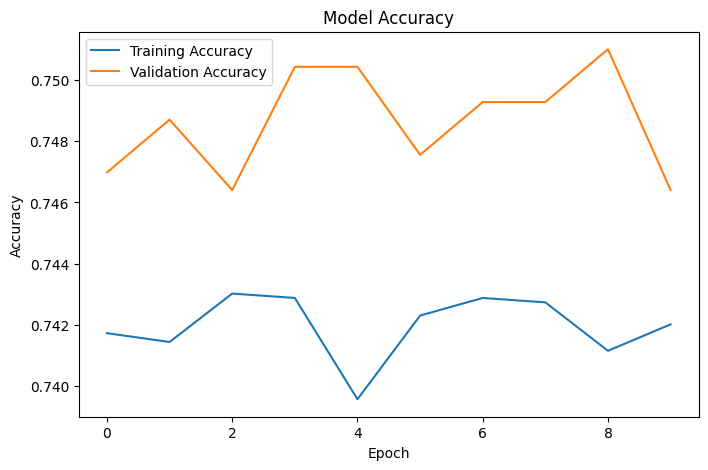

In [30]:
# Extract accuracy and validation accuracy from history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the accuracy
plt.figure(figsize=(8, 5))
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From the bove Model we will use Random Forest to Predict

In [69]:
sample_submission =pd.read_csv('sample_submission.csv')
sample_submission.columns=["PassengerId","Transported_Actual"]


y_test_pred_rf = model_RF.predict(test)
y_test_pred_rf=pd.DataFrame(y_test_pred_rf,columns=["Transported"])
y_test_pred_rf["Transported"]=  y_test_pred_rf["Transported"].map({1:True,0:False})
test_out =pd.concat([test,y_test_pred_rf],axis=1)
test_submitted =pd.concat([test_out,sample_submission],axis=1)


# Acurracy
Total_records =test_submitted.shape[0]
correct_predict = test_submitted[test_submitted["Transported"]==test_submitted["Transported_Actual"]].shape[0]
accuracy=(correct_predict/Total_records)*100
print(f"Accuracy : {accuracy}")

Accuracy : 52.09258826280103
